In [1]:
import pandas as pd
import numpy as np
# !pip install umap-learn
import umap.umap_ as umap

from matplotlib import pyplot as plt

### Dataset analysis

In [2]:
met_df = (pd.read_csv("./metabolomics/data_zscore_comp_id.csv"))

In [3]:
met_df.head()

,Unnamed: 0,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
0,42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
2,27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
3,38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
4,437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
met_df.shape

(968, 464)

In [5]:
met_df['Unnamed: 0'].unique().shape # unnamed -> unique values, id?

(968,)

In [6]:
comp_df = pd.read_csv("./metabolomics/compAnno.csv")

In [7]:
comp_df.head()

,BIOCHEMICAL,PATHWAY_SORTORDER,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,CHEMICAL_ID,PUBCHEM,CAS,KEGG,HMDB_ID
0,S-1-pyrroline-5-carboxylate,64.0,Amino Acid,Glutamate Metabolism,42370,Pos Early,35,11966181,2906-39-0,C04322,HMDB0001301
1,spermidine,553.0,Amino Acid,Polyamine Metabolism,485,Pos Early,50,1102,124-20-9,C00315,HMDB0001257
2,1-methylnicotinamide,4336.0,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,27665,Pos Early,55,457,1005-24-9,C02918,HMDB0000699
3,"12,13-DiHOME",2048.0,Lipid,"Fatty Acid, Dihydroxy",38395,Neg,62,10236635,263399-35-5,C14829,HMDB0004705
4,5-hydroxyindoleacetate,295.0,Amino Acid,Tryptophan Metabolism,437,Neg,71,1826,54-16-0,C05635,HMDB0000763


comp_df.shape

In [8]:
comp_df['COMP_ID'].unique().shape

(963,)

In [9]:
met_df['Unnamed: 0'].unique().shape

(968,)

In [10]:
# missing ids?
missing_ids = [x for x in list(met_df['Unnamed: 0']) if x not in list(comp_df['COMP_ID'])]
missing_ids

[33967, 38595, 53189, 52896, 52897]

In [11]:
for x in missing_ids:
    print(x, met_df[met_df['Unnamed: 0'] == x].isna().sum(axis=1))

33967 963    463
dtype: int64
38595 964    463
dtype: int64
53189 965    463
dtype: int64
52896 966    463
dtype: int64
52897 967    463
dtype: int64


In [12]:
# rows with all NaN
len([x for x in met_df.isna().sum(axis=1) if x == 463])

8

In [13]:
met_df.set_index('Unnamed: 0', inplace=True)
met_df.index.name = None
met_df.head()

,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# drop rows with all NaN values
met_df.dropna(axis=0, how='all', inplace=True)

In [15]:
met_df.shape

(960, 463)

In [16]:
# drop rows containing more than 80% NaN values
perc = 0.8
min_count =  int((1 - perc)*met_df.shape[1] + 1)
met_df.dropna(axis=0, thresh=min_count, inplace=True)

In [17]:
met_df.shape

(948, 463)

In [18]:
# fill missing z-scores
met_df.fillna(0, inplace=True)

In [19]:
# features: metabolomics z-scores
# samples: patients
met_df = met_df.T

In [20]:
met_df.shape

(463, 948)

In [21]:
met_df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.259948,-0.610334,-1.201809,-0.954275,0.240999,-0.485987,0.598959,-0.286401,-1.043185,-0.660514,...,-1.094129,-0.419479,0.158619,-0.817640,1.120043,0.045789,0.201601,-0.039255,2.783415,-0.127840
BAYL-08998,0.170557,-0.811169,0.387317,-0.906589,-0.454249,-0.409053,0.612680,-0.315412,-1.095163,0.001887,...,-1.116107,0.000000,-0.424652,0.987125,-0.045571,0.295498,0.409790,-0.195962,1.987574,-0.160196
BAYL-08999,0.814204,-0.554787,-1.062940,4.929942,-0.000406,0.022588,3.050217,2.366699,1.132455,-0.142467,...,0.391963,0.284916,0.020418,-0.129573,-0.090421,0.118741,1.112410,-0.048789,1.794673,-0.226005
BAYL-09000,0.038958,-0.603603,0.525122,0.974496,-0.542391,-0.494779,-0.347355,-0.392808,-0.713237,-0.359097,...,-0.119144,-0.807474,1.317694,0.175748,1.241565,0.113926,-0.978284,-0.653111,0.000000,-0.063945
BAYL-09001,-0.504466,-0.549375,-0.973446,-0.740805,0.000000,-0.049422,-0.787278,-0.598359,-0.781751,-0.515097,...,-0.351091,0.000000,-0.405493,0.000000,0.297091,-0.581249,0.637026,-0.778015,0.829880,-0.017687


In [22]:
clin_df = pd.read_csv("./metabolomics/sampleAttr.csv")

In [23]:
clin_df.head()

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,ga.w,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height
0,BAYL-08997,0,batch_2023,45.1,7,0,Chinese,55.3,1.0,True,S1_1_Ca,36.64887063655031,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.444444,1,150
1,BAYL-08998,0,batch_2023,82.2,7,0,Chinese,63.1,1.0,True,S1_2_Ca,32.309377138945926,2,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.267516,1,171
2,BAYL-08999,0,batch_2023,69.6,7,0,Chinese,58.8,0.0,True,S1_1_Co,43.90143737166324,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,99.367089,1,161
3,BAYL-09000,0,batch_2023,51.4,7,0,Chinese,62.9,0.0,True,S1_2_Co,33.11430527036276,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,98.684211,1,154
4,BAYL-09001,0,batch_2023,39.2,7,0,Chinese,45.3,0.0,True,S1_4_Co,24.32032854209445,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,95.597484,1,161


In [24]:
clin_df.shape

(463, 20)

In [25]:
clin_df.isna().sum()

sIDs              0
sle               0
BErm              0
weight            0
conception        0
smoking           0
race              0
crl               0
pe                0
ASA               0
ptIDs             0
age               0
prev.pe           0
ga.w            463
consss_batch      0
ASA_tri_chr       0
STUDY             0
Compliance        0
trimester         0
height            0
dtype: int64

In [26]:
# ga.w -> all NaN
clin_df.drop(['ga.w'], axis=1, inplace=True)

In [27]:
clin_df.shape

(463, 19)

### batch effect correction

In [28]:
batches = list(clin_df["STUDY"].unique())
batches_dict = {k:v for v, k in enumerate(batches)}
batches_dict

{'CHUK': 0, 'ASPRE_LR': 1, 'ASPRE_HR': 2, 'from-2015': 3}

In [29]:
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(met_df)

In [30]:
# !pip install seaborn
import seaborn as sns

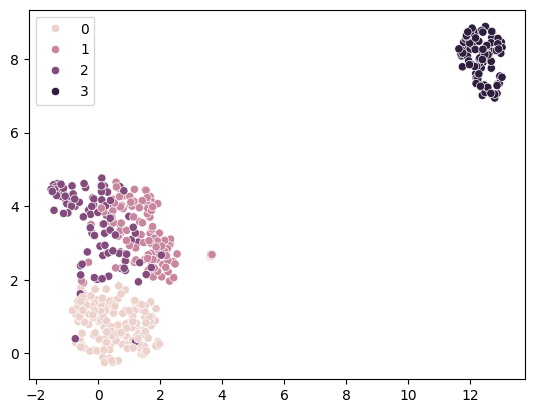

In [31]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [32]:
# !pip install combat
from combat.pycombat import pycombat

In [33]:
met_df_corrected = pycombat(met_df.T, clin_df['STUDY'].values).T

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/home/lucija/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [34]:
umap_result_corrected = umap_model.fit_transform(met_df_corrected)

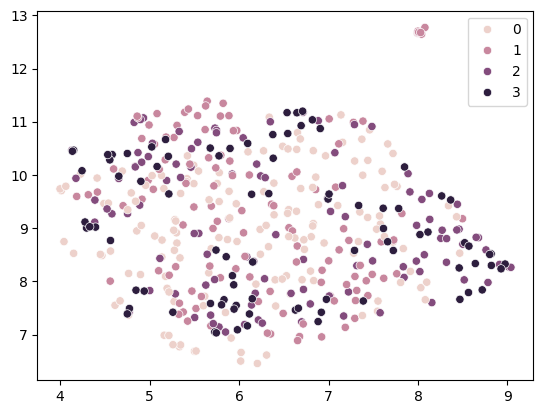

In [35]:
sns.scatterplot(x=umap_result_corrected[:, 0], y=umap_result_corrected[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [36]:
# TODO: analyse outliers

In [37]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [38]:
outliers = find_outliers_IQR(pd.DataFrame(umap_result_corrected)).dropna(how='all')
outliers

,0,1


In [39]:
outliers = outliers.index

In [40]:
[x[0] for i, x in enumerate(umap_result_corrected) if i in outliers]

[]

In [41]:
[x[1] for i, x in enumerate(umap_result_corrected) if i in outliers]

[]

In [42]:
met_df_corrected.iloc[outliers]

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754


In [43]:
clin_df.iloc[outliers]

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height


In [44]:
# FIX: uporediti vrednosti sa ostalim vrednostima...

In [45]:
# [int(x) for x in clin_df['age']]
# invalid literal for int() with base 10: '36.64887063655031'

# [float(x) for x in clin_df['age']]
# could not convert string to float: '30,3'

clin_df['age'] = [float(x.replace(',', '.')) for x in clin_df['age']]

In [46]:
clin_df['age'].mean()

32.02567562972786

In [47]:
met_df_corrected.describe()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,-0.169408,0.121773,0.255868,-0.029823,-0.008549,0.085161,-0.065468,0.051058,-0.120977,0.007537,...,0.161086,-0.110067,-0.005973,0.032994,0.184562,-0.083637,0.127352,-0.012756,0.075989,-0.392151
std,0.722855,1.180095,0.914649,1.230802,0.685252,0.781680,0.850947,0.749957,0.736314,0.934548,...,0.866302,0.585713,0.904984,0.496395,0.819232,0.936270,0.901466,0.696530,0.844281,0.399632
min,-3.284586,-3.291761,-2.028656,-2.741620,-0.991647,-1.651266,-1.719936,-1.746115,-1.805253,-1.697495,...,-2.118387,-1.833170,-4.135007,-1.951304,-2.891681,-1.821759,-2.464369,-1.244519,-1.690018,-0.757510
25%,-0.675170,-0.501887,-0.370430,-0.689911,-0.350550,-0.338323,-0.644090,-0.452048,-0.576718,-0.527504,...,-0.409054,-0.414157,-0.555595,-0.079747,-0.374769,-0.624117,-0.485755,-0.412198,-0.510689,-0.516883
50%,-0.052360,-0.062688,0.056947,-0.292955,-0.073553,-0.067943,-0.239238,-0.108741,-0.231162,-0.149471,...,0.076183,-0.052062,-0.115364,0.032251,0.016471,-0.303543,-0.004064,-0.016027,-0.035259,-0.445395
75%,0.283100,0.383105,0.704828,0.390062,0.062577,0.362855,0.358531,0.427150,0.185287,0.299983,...,0.575315,-0.015330,0.346097,0.050890,0.674779,0.249727,0.619860,0.136293,0.592260,-0.354473
max,3.872999,8.944485,4.716328,15.520435,6.005495,4.707365,4.209447,3.809662,4.733485,6.229459,...,4.547988,5.426753,5.151726,3.073103,3.558295,8.825348,3.580585,6.308262,3.322493,6.745456


#### selecting patients who do not take aspirin

In [48]:
met_df_corrected.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.964491,-0.431870,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.989288,-0.052062,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,0.712233,0.205910,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.135561,-0.783174,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.126139,-0.052062,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903


In [49]:
met_df_corrected.index

Index(['BAYL-08997', 'BAYL-08998', 'BAYL-08999', 'BAYL-09000', 'BAYL-09001',
       'BAYL-09002', 'BAYL-09003', 'BAYL-09004', 'BAYL-09005', 'BAYL-09006',
       ...
       's_21944', 's_22832', 's_22842', 's_22997', 's_23003', 's_23077',
       's_23123', 's_22787', 's_23294', 's_73385'],
      dtype='object', length=463)

In [50]:
# pe: preeclampsia (1/0)
# ASA: aspirin (True/False)
target = clin_df[['pe', 'ASA']]
target.index = met_df.index
target

,pe,ASA
BAYL-08997,1.0,True
BAYL-08998,1.0,True
BAYL-08999,0.0,True
BAYL-09000,0.0,True
BAYL-09001,0.0,True
...,...,...
s_23077,0.0,False
s_23123,0.0,False
s_22787,0.0,False
s_23294,0.0,False


In [51]:
df = met_df_corrected.join(target)

In [52]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53267,54840,57714,57716,57718,57719,57720,57754,pe,ASA
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346,1.0,True
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117,1.0,True
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349,0.0,True
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059,0.0,True
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903,0.0,True


In [53]:
df = df[df['ASA'] == False].copy(deep=True)

In [54]:
df.shape

(312, 950)

In [55]:
df.drop(['ASA'], axis = 1, inplace=True)

In [56]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53266,53267,54840,57714,57716,57718,57719,57720,57754,pe
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.106908,-1.411424,0.30259,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809,0.0
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.106908,-0.639404,0.05089,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516,0.0
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,-0.106908,-0.399493,0.05089,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825,0.0
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,-0.106908,-0.905314,0.05089,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870,0.0
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.403598,-0.138321,0.05089,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875,0.0


In [57]:
target = df['pe']
df.drop(['pe'], axis=1, inplace=True)
target

BAYL-09014    0.0
BAYL-09015    0.0
BAYL-09016    0.0
BAYL-09017    0.0
BAYL-09018    0.0
             ... 
s_23077       0.0
s_23123       0.0
s_22787       0.0
s_23294       0.0
s_73385       1.0
Name: pe, Length: 312, dtype: float64

In [58]:
np.bincount(target)

array([215,  97])

In [59]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.30259,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.166551,-0.106908,-0.639404,0.05089,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.05089,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.05089,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.05089,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875


In [60]:
df

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.302590,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.166551,-0.106908,-0.639404,0.050890,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.050890,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.050890,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.050890,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-0.052360,-0.645759,-0.928460,0.322687,-0.011331,-0.009173,-1.298761,-0.056718,-0.104810,-0.513336,...,-0.736803,-0.663873,-0.115364,0.032251,-0.928072,-0.391278,2.037867,-0.016027,1.079962,-0.623414
s_23123,-0.052360,-0.166949,0.115088,-0.439904,-0.011331,-0.332268,-0.551854,0.175810,-0.489038,-0.477625,...,-0.610517,-0.854820,-0.115364,0.032251,-2.891681,-0.114168,1.405134,-0.016027,1.153829,-0.559394
s_22787,-0.052360,0.534076,-1.303274,-1.122262,-0.011331,0.466516,-1.077055,-0.012729,1.205847,-0.321399,...,-0.012596,-0.725384,-0.115364,0.032251,0.505416,1.012587,-1.602580,-0.016027,-1.581236,-0.520321
s_23294,-0.052360,-0.597626,0.781302,1.685294,-0.011331,-0.980053,-0.276637,0.632209,-0.021027,-0.833430,...,-1.089903,0.229379,-0.115364,0.032251,-0.049360,-0.354491,-0.570818,-0.016027,-0.574198,-0.587279


### Feature selection

In [61]:
from pymrmre import mrmr

In [62]:
# iteritems is deprecated, downgrade pandas....
# !pip install pandas==1.5.3 

In [225]:
# TODO: choose hyperparameters solution_length, solution_count... (GridSearchCV ?)
# FIX: feature selection after train test split or evaluation using cv

In [174]:
solutions = mrmr.mrmr_ensemble(features=df, targets=pd.DataFrame(target), solution_length=100, solution_count=10)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

In [180]:
len(solutions.iloc[0])

10

In [181]:
df.columns

Index([42370,   485, 27665, 38395,   437,   528,  1417,  1549,   531,  1414,
       ...
       53157, 53266, 53267, 54840, 57714, 57716, 57718, 57719, 57720, 57754],
      dtype='object', length=948)

In [182]:
df[solutions.iloc[0][0]]

,38165,57591,53254,48009,62059,19263,37200,46992,47802,37184,...,46356,37203,52988,1651,15122,57754,40062,47673,61888,37432
BAYL-09014,0.226008,-0.649723,0.133451,-0.873967,-1.445462,0.052194,1.722469,0.072381,0.180460,-0.377999,...,-0.263853,-0.460205,0.904831,-0.780663,-0.284867,-0.482809,1.151714,0.101554,0.035625,-1.176474
BAYL-09015,0.280088,-1.169474,0.133451,0.267714,-1.434013,0.085407,1.604613,0.072381,0.233187,0.938145,...,-0.024652,-0.396398,0.603608,-0.985506,1.093458,-0.483516,-1.454366,0.144196,0.035625,-1.047642
BAYL-09016,0.345725,-0.581132,0.133451,-0.846086,-1.097334,0.327047,1.817750,0.072381,-1.070358,1.309655,...,-0.024652,-0.028450,1.263021,-0.785994,0.127121,0.023825,-0.915954,0.144196,0.035625,-0.650972
BAYL-09017,-0.493147,-0.393785,-0.085648,-0.751530,-0.934958,0.245958,0.436989,0.072381,0.233187,0.506806,...,-0.024652,0.008105,0.668270,-0.580400,-0.505265,-0.399870,-0.884001,0.053112,0.035625,0.156994
BAYL-09018,0.447983,-0.620911,0.146754,-0.524852,-0.935897,0.359894,0.675523,0.126687,0.233187,0.506806,...,-0.024652,-0.155257,1.116742,-0.697442,-0.322457,-0.308875,-0.960419,0.144196,0.035625,-0.659620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-0.645360,-0.202399,0.537433,-0.712418,0.131810,1.170193,1.156250,-0.425683,-1.611838,0.661654,...,-0.201810,0.048535,-0.651815,0.906641,-0.496966,-0.623414,2.122115,0.045606,1.072564,-0.202843
s_23123,0.084574,1.225293,-0.159983,-0.839823,-0.305401,1.316196,1.211545,0.395122,-0.191890,0.274139,...,0.065861,0.266852,-0.542062,0.876260,-0.748052,-0.559394,0.766482,0.206543,0.544920,0.288671
s_22787,-0.693663,-0.290048,0.987804,0.183337,0.027231,0.845691,0.903213,0.255769,-0.454045,0.501257,...,-0.201810,-0.305440,-0.293155,-0.708969,-0.139152,-0.520321,-2.261789,-0.405235,-0.377701,0.880294
s_23294,-0.212521,1.085546,1.146002,0.153304,-0.495719,0.457104,1.205941,0.466277,-0.187356,0.178998,...,-0.842581,-0.115502,-0.900354,0.289218,-1.506112,-0.587279,0.652660,-0.260279,0.628742,0.253831


### Classification

In [ ]:
# TODO: try different classifiers....

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## shape (312, 948)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [185]:
X_train.shape

(249, 948)

In [186]:
X_test.shape

(63, 948)

In [187]:
scaler = StandardScaler()

In [188]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
model = RandomForestClassifier(n_estimators=10, max_depth=20)

In [190]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [191]:
y_pred = model.predict(X_test)

In [192]:
accuracy_score(y_test, y_pred)

0.7301587301587301

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82        43
         1.0       0.67      0.30      0.41        20

    accuracy                           0.73        63
   macro avg       0.70      0.62      0.62        63
weighted avg       0.72      0.73      0.69        63



In [194]:
confusion_matrix(y_test, y_pred)

array([[40,  3],
       [14,  6]])

In [195]:
importances = model.feature_importances_

In [196]:
importances.max()

0.028619211005344168

In [197]:
importances.min()

0.0

In [198]:
len([x for x in importances if x == 0])

769

In [199]:
from xgboost import XGBClassifier

In [200]:
bst = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

In [201]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [202]:
y_pred = bst.predict(X_test)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74        43
         1.0       0.42      0.40      0.41        20

    accuracy                           0.63        63
   macro avg       0.57      0.57      0.57        63
weighted avg       0.63      0.63      0.63        63



In [204]:
confusion_matrix(y_test, y_pred)

array([[32, 11],
       [12,  8]])

## shape (312, 100)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df[solutions.iloc[0][0]], target, stratify=target, test_size=0.2)

In [206]:
X_train.shape

(249, 100)

In [207]:
X_test.shape

(63, 100)

In [208]:
scaler = StandardScaler()

In [209]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
model = RandomForestClassifier(n_estimators=10, max_depth=20)

In [211]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [212]:
y_pred = model.predict(X_test)

In [213]:
accuracy_score(y_test, y_pred)

0.7777777777777778

In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86        43
         1.0       0.88      0.35      0.50        20

    accuracy                           0.78        63
   macro avg       0.82      0.66      0.68        63
weighted avg       0.80      0.78      0.74        63



In [215]:
confusion_matrix(y_test, y_pred)

array([[42,  1],
       [13,  7]])

In [216]:
importances = model.feature_importances_

In [217]:
importances.max()

0.04551156443319198

In [218]:
importances.min()

0.0

In [219]:
len([x for x in importances if x == 0])

7

In [220]:
bst = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

In [221]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [222]:
y_pred = bst.predict(X_test)

In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        43
         1.0       0.69      0.45      0.55        20

    accuracy                           0.76        63
   macro avg       0.74      0.68      0.69        63
weighted avg       0.75      0.76      0.75        63



In [224]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [11,  9]])